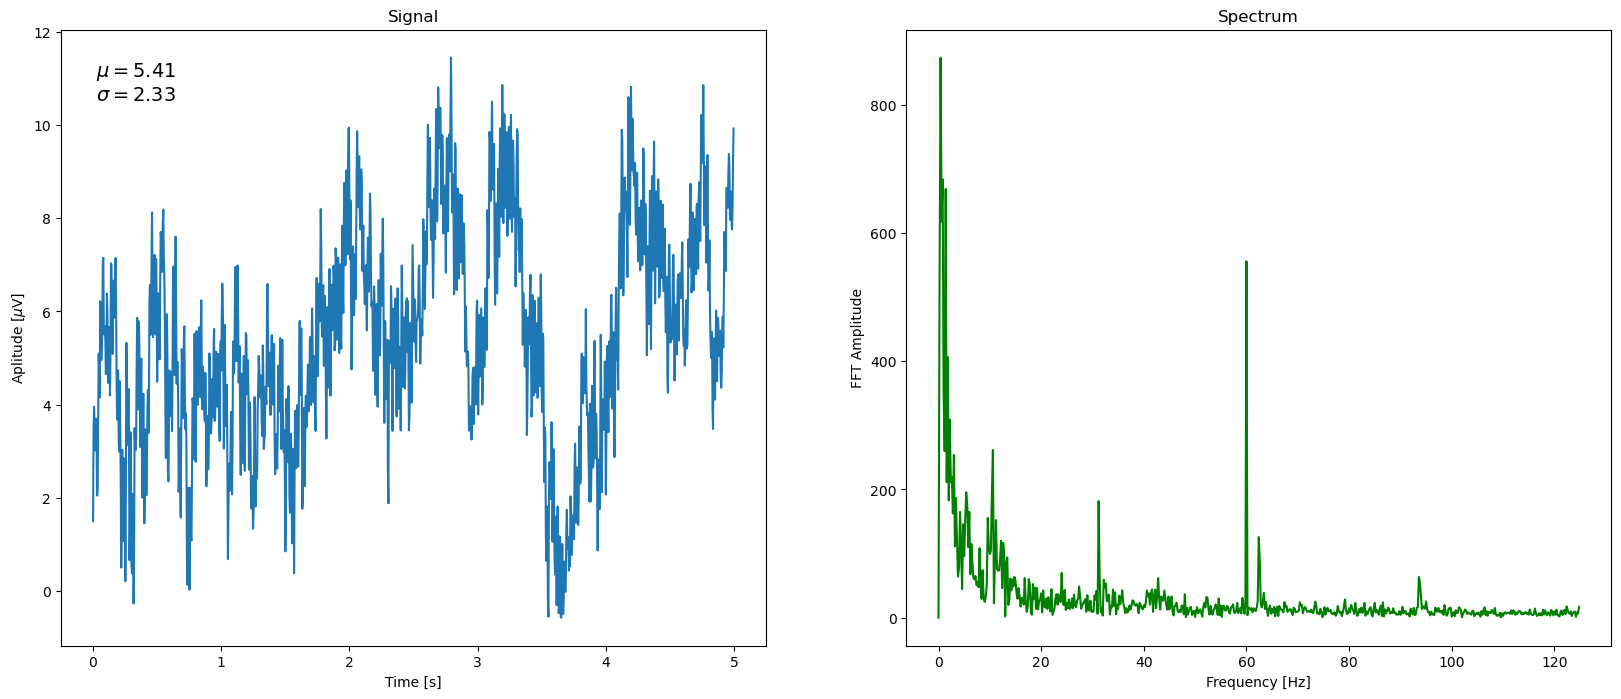

In [182]:
from matplotlib import pyplot as plt
import glob
import numpy
import os
import random


dir = '/path/to/prepared/dataset/target'
frequency = 250


assert os.path.isdir(dir)

plt.figure(figsize = (20, 8))
files = glob.glob(os.path.join(dir, "*"))
data = numpy.load(random.choice(files)) 

for idx, channel in enumerate(data):
    if idx >= 8: break

    # Plot signal
    ax = plt.subplot(max(1, min(8, len(data))), 2, 2 * idx + 1)
    plt.plot(numpy.arange(len(data[idx])) / frequency, data[idx])
    text = '\n'.join((
        r'$\mu=%.2f$' % (numpy.mean(data[idx]), ),
        r'$\sigma=%.2f$' % (numpy.std(data[idx]), )))
    plt.text(0.05, 0.95, text, verticalalignment = 'top', transform = ax.transAxes, fontsize = 14)
    plt.title('Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Aplitude [$\\mu$V]')

    # Plot frequency spectrum
    ax = plt.subplot(max(1, min(8, len(data))), 2, 2 * idx + 2)
    X = numpy.fft.fft(data[idx] - numpy.mean(data[idx]))
    N = len(X)
    n = numpy.arange(N)
    T = N / frequency
    freq = n / T 

    # Get the one-sided specturm
    n_oneside = N // 2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    plt.plot(f_oneside, numpy.abs(X[:n_oneside]), 'g')
    plt.title('Spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('FFT Amplitude')
